### Contents

* [1. Problem formulation](#1)
* [2. Collecting the data](#2)
* [3. Exploratory Data Analysis (EDA)](#3)
* [4. Data Preprocessing](#4)
* [5. Choosing and Training a model](#5)
* [6. Evaluating a model](#6)

<a name='1'><a>
# **1. Problem Formulation**

---
### Objective

To develop a predictive model that estimates an individual’s **health risk level** (or probability of being at high health risk) based on their lifestyle behaviours and biometric/health indicators.

### Dataset Overview

* **Source:** Lifestyle and Health Risk Prediction dataset from Kaggle
* **Features:** Includes variables such as age, gender, BMI, physical activity, sleep hours, diet habits, water intake, smoking/drinking status, previous health conditions, etc. (Actual columns may vary)
* **Target Variable:** A health risk indicator (for example, a binary label of high vs low risk, or a risk score) which the model will predict.

### Problem Statement

* Using the given lifestyle and health-related features, build a machine-learning model to predict whether a person is **at elevated health risk** (or to what extent).
* Identify which lifestyle factors (e.g., sleep duration, exercise level, water intake) and biometrics (e.g., BMI, age) most strongly correlate with higher health risk.
* Evaluate the model’s performance using appropriate metrics and ensure it generalises well to unseen individuals.

### Why this is Important

* Lifestyle factors are modifiable—understanding risk can lead to early intervention and healthier choices.
* A good predictive model can help healthcare providers or wellness programs **target individuals** needing more support.
* It illustrates how data analytics can bridge personal health data and actionable health insights.

### Challenges & Considerations

* Data may include **imbalanced target classes** (few high-risk vs many low-risk cases).
* Some lifestyle features may require **encoding** or handling of categorical values (e.g., smoker yes/no).
* Features likely have different scales (e.g., BMI vs hours of sleep) → need for **scaling/standardisation**.
* Potential multicollinearity (e.g., BMI and weight/height) or confounding variables must be checked.
* Model interpretability: It’s important not only to predict risk but to **explain** which factors contribute most.

### Expected Outcome

* A model capable of predicting health risk with acceptable accuracy (e.g., high recall for high-risk individuals).
* A ranked list of lifestyle/health features by importance (so stakeholders know which behaviours to prioritise).
* Insights and recommendations—for example: “Individuals sleeping fewer than 6 hours and exercising less than X minutes per week show significantly higher risk.”

---

<a name='2'><a>
# **2. Collecting the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


## 🧾 Feature Information

| **Feature Name** | **Type**             | **Description**                                                                  |
| ---------------- | -------------------- | -------------------------------------------------------------------------------- |
| **Age**          | Numerical            | Age of the individual (in years)                                                 |
| **Weight**       | Numerical            | Weight of the person (in kilograms)                                              |
| **Height**       | Numerical            | Height of the person (in centimeters or meters)                                  |
| **Exercise**     | Categorical/Ordinal  | Level or frequency of physical exercise (e.g., Regular / Sometimes / None)       |
| **Sleep**        | Numerical            | Average hours of sleep per day                                                   |
| **Sugar_Intake** | Categorical/Ordinal  | Level of sugar consumption (e.g., Low / Moderate / High)                         |
| **Smoking**      | Categorical          | Smoking habit (Yes / No)                                                         |
| **Alcohol**      | Categorical          | Alcohol consumption habit (Yes / No)                                             |
| **Married**      | Categorical          | Marital status (Yes / No)                                                        |
| **Profession**   | Categorical          | Occupation type of the person (e.g., Office Job / Labor / Student etc.)          |
| **BMI**          | Numerical            | Body Mass Index calculated from height and weight                                |
| **Health_Risk**  | Categorical (Target) | Target variable indicating overall health risk level (e.g., Low / Medium / High) |

In [4]:
len(df)

5000

In [5]:
len(df.columns)

12

<a name='3'><a>
# **3. Exploratory Data Analysis**


Spliting data into training and testing sets to avoid data leakage.

Training set → used to train the model

Testing set → used to evaluate the model

Using scikit-learn function to split the data before analysis.

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=20)

print("Size of train data: {}\nSize of test data: {}".format(len(train_data), len(test_data)))

Size of train data: 4000
Size of test data: 1000


In [7]:
# Copying the training data to revert it in case I mess things up:
train_data_1 = train_data.copy()

In [8]:
train_data.describe()

,age,weight,height,sleep,bmi
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,48.845750,77.305000,171.881500,6.999800,26.838625
std,17.806227,18.690674,15.786046,1.419519,8.244535
min,18.000000,45.000000,145.000000,3.000000,11.600000
25%,34.000000,61.000000,159.000000,6.000000,20.400000
50%,49.000000,77.000000,171.000000,7.000000,26.000000
75%,64.000000,94.000000,186.000000,8.000000,32.400000
max,79.000000,109.000000,199.000000,10.000000,51.400000


In [9]:
train_data.isnull().sum()

,0
age,0
weight,0
height,0
exercise,0
sleep,0
sugar_intake,0
smoking,0
alcohol,0
married,0
profession,0


No missing values

### Checking the value in categorical features

In [10]:
train_data['exercise'].value_counts()

,count
exercise,
medium,1576
low,1032
high,795
none,597


In [11]:
train_data['sugar_intake'].value_counts()

,count
sugar_intake,
medium,2015
low,1194
high,791


In [12]:
train_data['smoking'].value_counts()

,count
smoking,
no,3228
yes,772


In [13]:
train_data['alcohol'].value_counts()

,count
alcohol,
no,3006
yes,994


In [14]:
train_data['married'].value_counts()

,count
married,
yes,2397
no,1603


In [15]:
train_data['profession'].value_counts()

,count
profession,
driver,519
farmer,513
doctor,512
student,503
artist,495
engineer,494
office_worker,483
teacher,481


In [16]:
train_data['health_risk'].value_counts()

,count
health_risk,
high,2783
low,1217


### Numerical feature correlation

<Axes: >

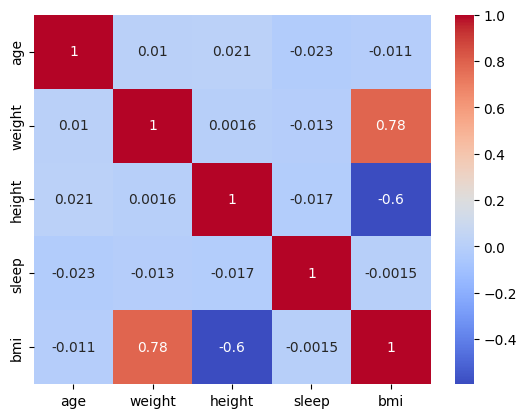

In [17]:
# correlation heatmap
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')

Weight and BMI are correlated

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'sleep'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

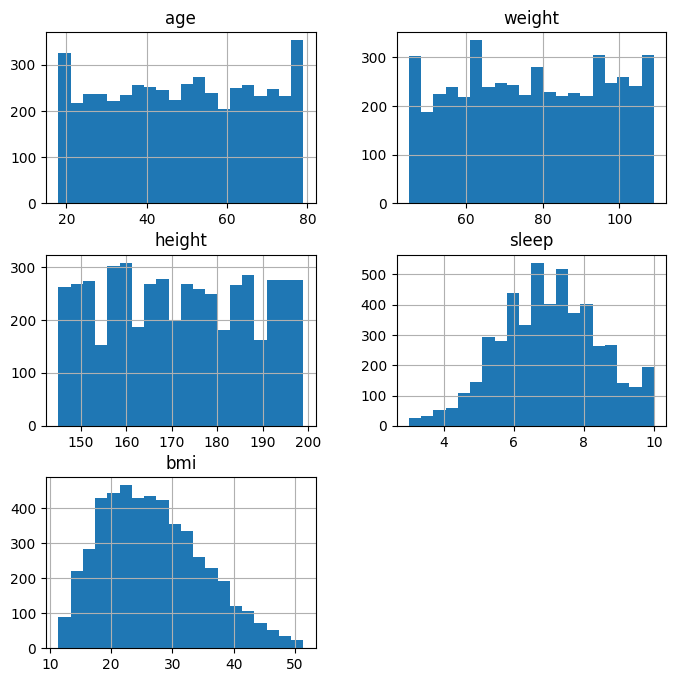

In [18]:
# histograms of numerical features
df.select_dtypes('number').hist(bins=20, figsize=(8,8))

### Bar charts on categorical features

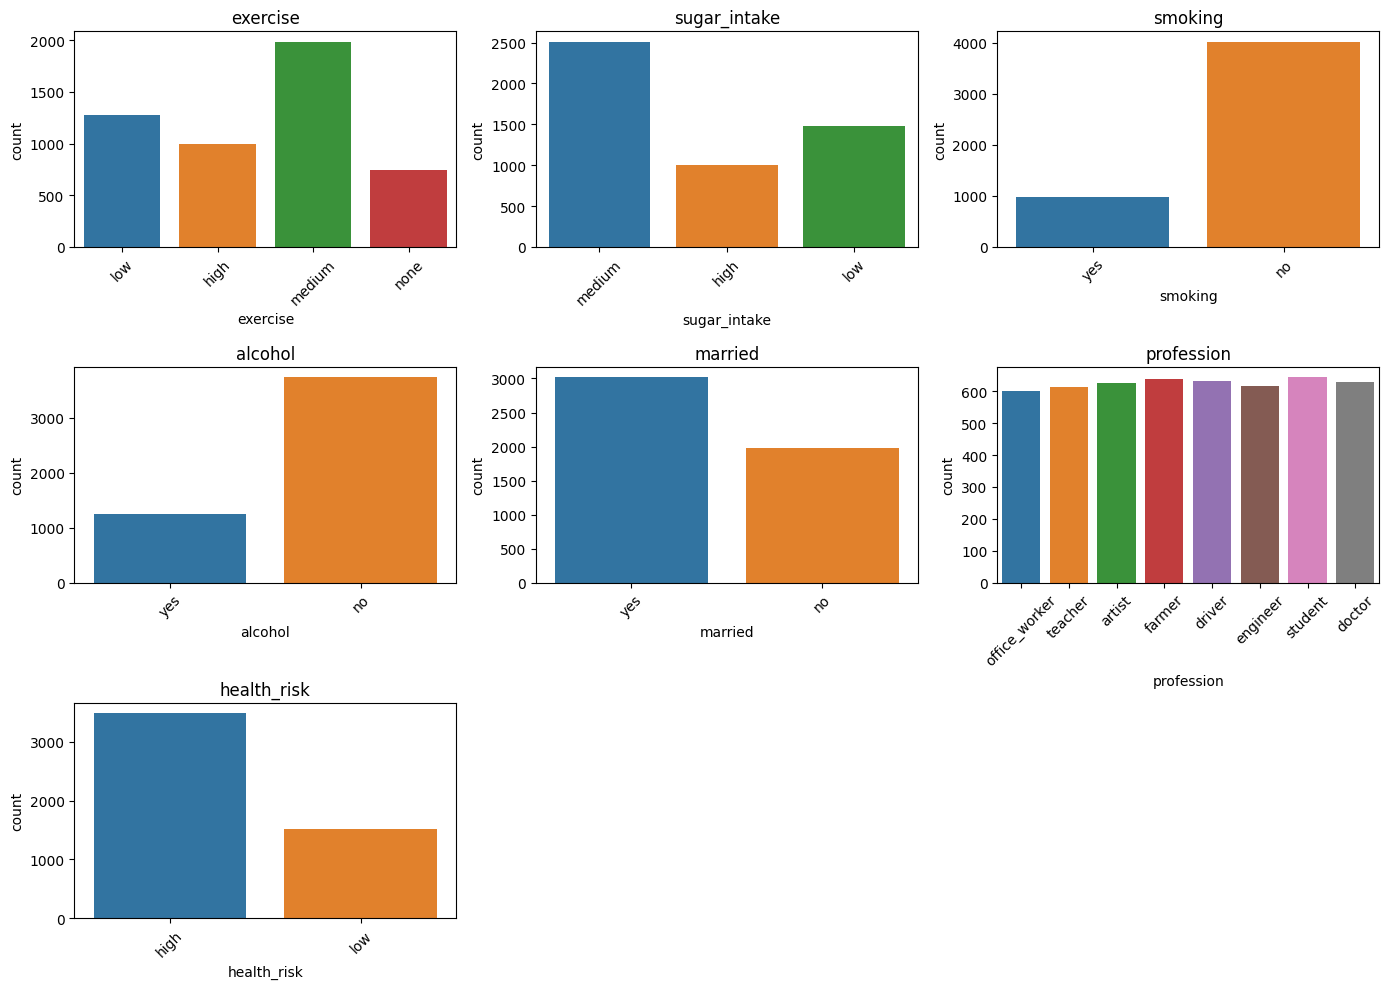

In [19]:
categorical_cols = df.select_dtypes('object').columns

plt.figure(figsize=(14,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()

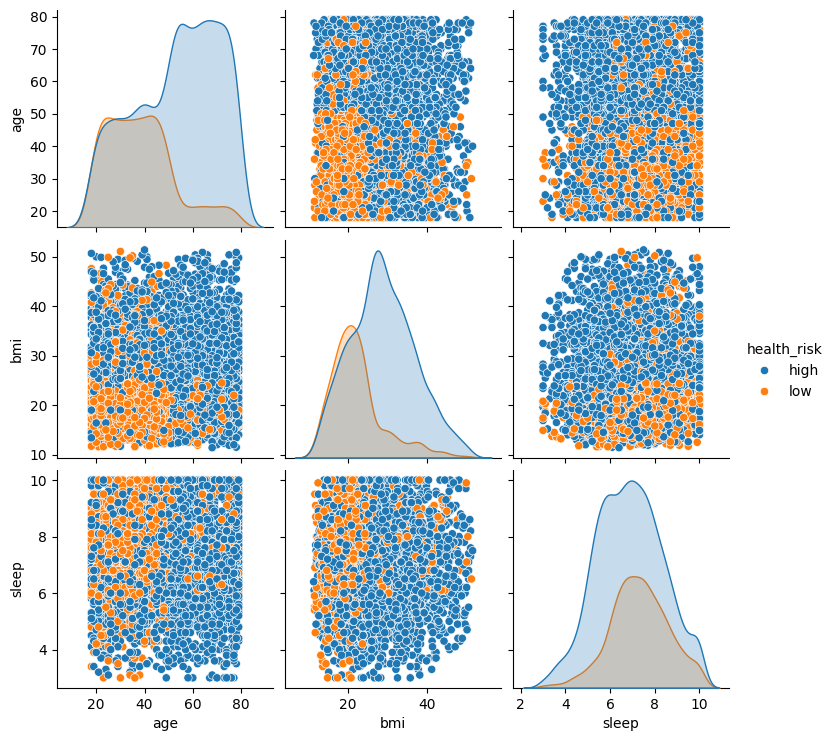

In [20]:
sns.pairplot(df[['age','bmi','sleep','health_risk']], hue='health_risk')

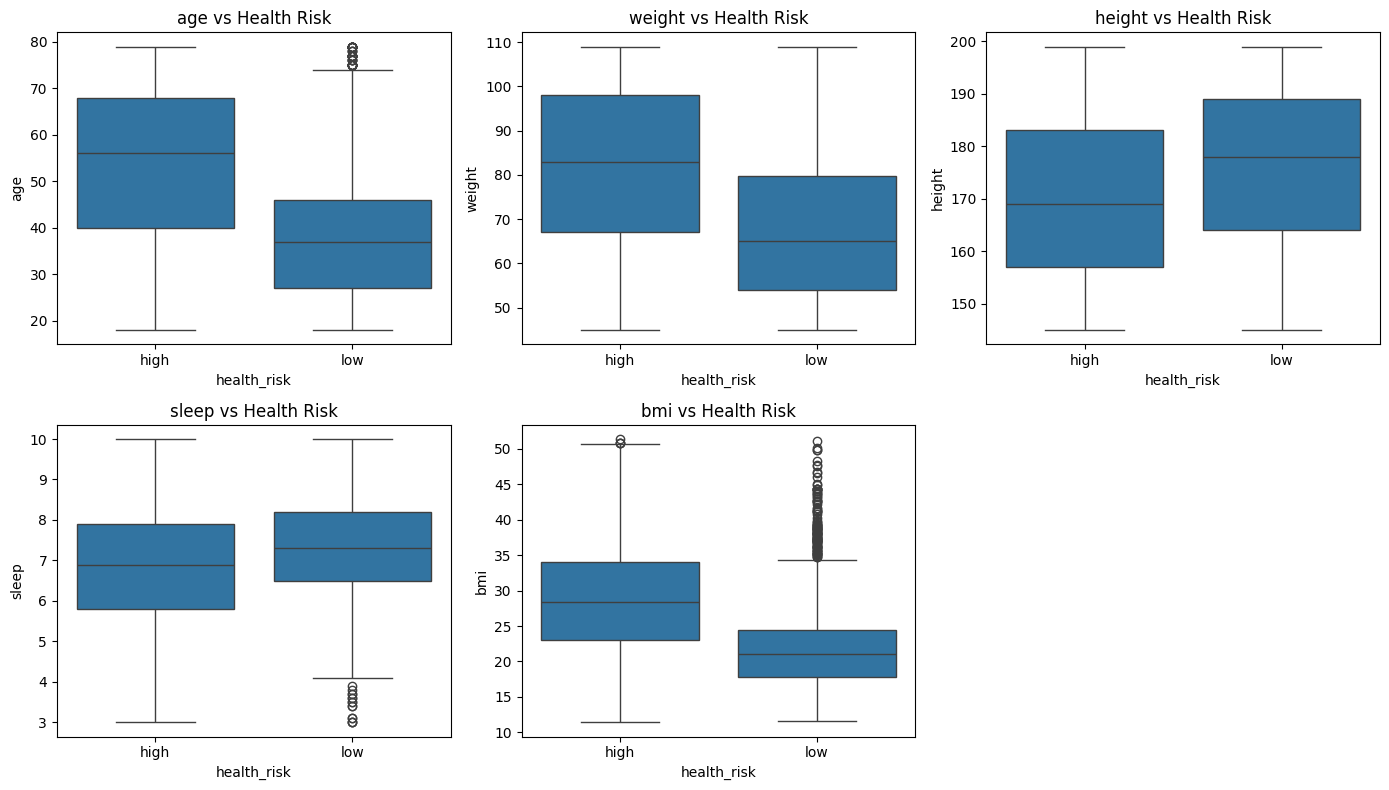

In [21]:
# Numeric vs Health Risk
numerical_cols = df.select_dtypes('number').columns

plt.figure(figsize=(14,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='health_risk', y=col)
    plt.title(f'{col} vs Health Risk')
plt.tight_layout()

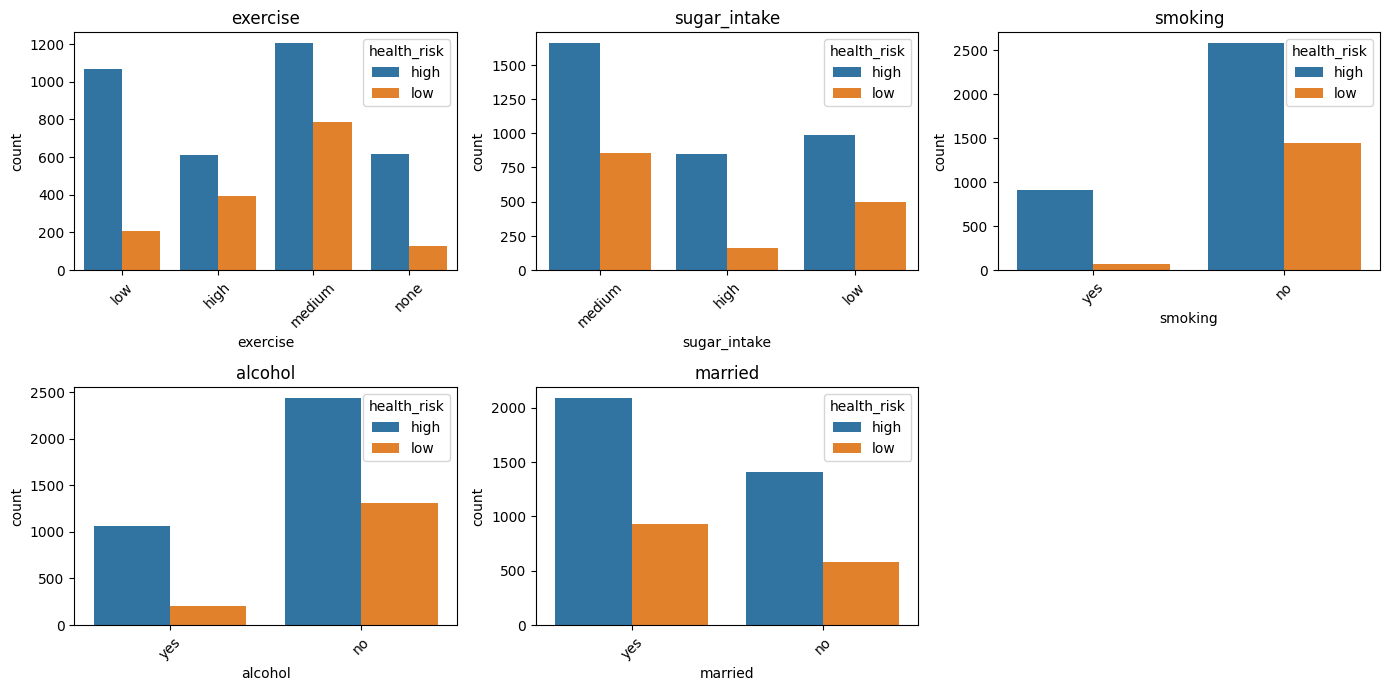

In [22]:
# Categorical vs Health Risk
cat_cols = ['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married']

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='health_risk', data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()

<a name='4'><a>
# **4. Data Preprocessing**

* Making data ready for the ML model.
* Applying the same steps to train and test sets.

    Key steps:
    * Filling missing values
    * Converting categorical features to numbers
    * Scaling numeric features

* Using functions wherever possible to apply the same steps consistently.

In [23]:
# Preparing training & testing data

x_train, x_test, y_train, y_test = train_test_split(df.drop('health_risk', axis=1), df['health_risk'], test_size=0.2, random_state=20)

In [24]:
x_train.head(3)

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
3702,37,55,164,low,6.7,medium,no,no,yes,driver,20.4
4393,46,48,158,medium,7.3,high,no,yes,yes,teacher,19.2
226,61,63,145,low,7.6,medium,no,no,no,farmer,30.0


In [25]:
y_train.head(3)

,health_risk
3702,low
4393,low
226,high


Great, input training data no longer contain the label.

As there is no missing values, I will do **encoding categorical features** and **scaling numerical features**.

In [26]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining column groups
num_features = ['age', 'weight', 'height', 'sleep', 'bmi']
cat_ord_features = ['exercise', 'sugar_intake']  # ordered categorical
cat_nom_features = ['smoking', 'alcohol', 'married', 'profession']  # nominal categorical

# Defining preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('ord', OrdinalEncoder(categories=[['none','low','medium','high'], ['low','medium','high']]), cat_ord_features),
        ('nom', OneHotEncoder(drop='first'), cat_nom_features)  # drop='first' to avoid dummy trap
    ]
)

# Fitting and transforming train data, transforming test data
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

In [27]:
# Encoding target variable (y) using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.transform(y_test)

<a name='5'><a>
# **5. Choosing and Training a Model**

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_preprocessed, encoded_y_train)

RandomForestClassifier(random_state=42)

<a name='6'><a>
# **6. Model Evaluation**

Notes:
 - MAE → average absolute error (lower is better)
 - RMSE → like MAE but penalizes large errors more
 - R² → 1.0 is perfect, 0 means model is as bad as guessing the mean

In [29]:
from sklearn.metrics import accuracy_score

# Predicting on training data
y_train_pred = model.predict(x_train_preprocessed)

# Evaluating performance
accuracy = accuracy_score(encoded_y_train, y_train_pred)
print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 100.00%


In [30]:
# Predicting on test data
y_test_pred = model.predict(x_test_preprocessed)

# Evaluating performance
test_accuracy = accuracy_score(encoded_y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 99.40%
